<a href="https://colab.research.google.com/github/felipecadm/carteira-de-ativos/blob/main/Carteira_de_A%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install -q yfinance

In [36]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import yfinance as yf

In [37]:
acoes = ['ENBR3.SA', 'ITSA4.SA', 'PETR4.SA', 'BOVA11.SA']

In [38]:
acoes_df = pd.DataFrame()

In [39]:
for acao in acoes:
  acoes_df[acao] = yf.download(acao, start='2020-02-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [40]:
acoes_df

,ENBR3.SA,ITSA4.SA,PETR4.SA,BOVA11.SA
Date,,,,
2020-02-03,22.959999,12.238095,28.180000,110.419998
2020-02-04,22.510000,12.266666,28.629999,111.209999
2020-02-05,22.450001,12.333333,28.389999,111.769997
2020-02-06,22.230000,12.209523,29.180000,110.949997
2020-02-07,21.500000,12.180952,28.930000,109.349998
...,...,...,...,...
2022-08-22,23.700001,9.320000,32.410000,106.730003
2022-08-23,23.459999,9.320000,33.439999,109.099998
2022-08-24,23.040001,9.290000,33.639999,109.180000


In [41]:
acoes_df = acoes_df.rename(columns={'ENBR3.SA': 'EDP', 'ITSA4.SA': 'ITSA', 'PETR4.SA': 'PETR', 'BOVA11.SA': 'IBOV'})

In [42]:
acoes_df

,EDP,ITSA,PETR,IBOV
Date,,,,
2020-02-03,22.959999,12.238095,28.180000,110.419998
2020-02-04,22.510000,12.266666,28.629999,111.209999
2020-02-05,22.450001,12.333333,28.389999,111.769997
2020-02-06,22.230000,12.209523,29.180000,110.949997
2020-02-07,21.500000,12.180952,28.930000,109.349998
...,...,...,...,...
2022-08-22,23.700001,9.320000,32.410000,106.730003
2022-08-23,23.459999,9.320000,33.439999,109.099998
2022-08-24,23.040001,9.290000,33.639999,109.180000


In [43]:
acoes_df.isnull().sum()

EDP     0
ITSA    0
PETR    0
IBOV    0
dtype: int64

In [44]:
acoes_df.to_csv('acoes.csv')

In [45]:
acoes_df.describe()

,EDP,ITSA,PETR,IBOV
count,638.000000,638.000000,638.000000,638.000000
mean,19.336176,9.801366,26.203072,103.669628
std,1.861765,0.955792,4.951698,12.377749
min,13.790000,7.171428,11.290000,61.139999
25%,17.962499,9.152380,22.799999,97.060001
50%,18.985000,9.747619,27.085000,105.799999
75%,20.850000,10.514285,29.360001,112.244200
max,24.170000,12.733333,37.230000,125.750000


In [46]:
acoes_df.columns

Index(['EDP', 'ITSA', 'PETR', 'IBOV'], dtype='object')

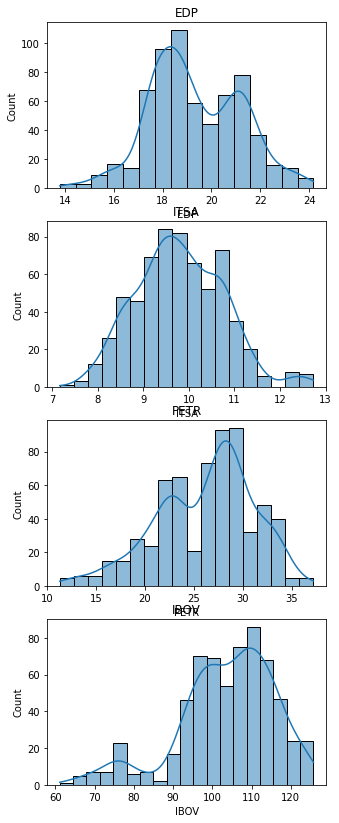

In [48]:
plt.figure(figsize=(5,25))
i = 0
for i in np.arange(0,len(acoes_df.columns)):
  plt.subplot(7, 1, i +1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde= True)
  plt.title(acoes_df.columns[i])

In [49]:
acoes_df_normalizado = acoes_df.copy()
for i in acoes_df_normalizado.columns:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]
type(acoes_df_normalizado)

pandas.core.frame.DataFrame

In [51]:
acoes_df_normalizado

,EDP,ITSA,PETR,IBOV
Date,,,,
2020-02-03,1.000000,1.000000,1.000000,1.000000
2020-02-04,0.980401,1.002335,1.015969,1.007155
2020-02-05,0.977788,1.007782,1.007452,1.012226
2020-02-06,0.968206,0.997665,1.035486,1.004800
2020-02-07,0.936411,0.995331,1.026615,0.990310
...,...,...,...,...
2022-08-22,1.032230,0.761556,1.150106,0.966582
2022-08-23,1.021777,0.761556,1.186657,0.988046
2022-08-24,1.003484,0.759105,1.193754,0.988770


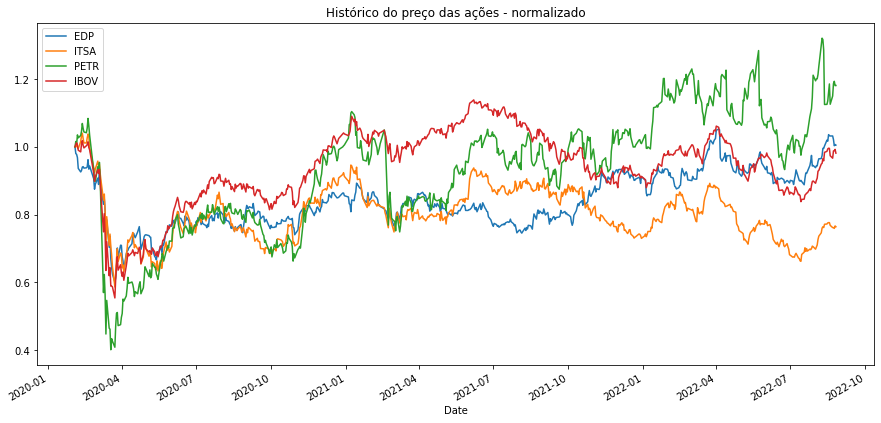

In [50]:
acoes_df_normalizado.plot(figsize = (15,7), title = 'Histórico do preço das ações - normalizado');